# 3D viewing and VTK export

GeoST makes use of PyVista to allow the user to export data to Visualization Toolkit (VTK) 
format as well as interactively view data in 3D. In this example we create a simple
3D plot of some boreholes and the GeoTOP model in the area of the 
Utrecht Science Park (USP).

Let's import GeoST and PyVista and load the data we are going to work with:

In [ ]:
import pyvista as pv

import geost
from geost.bro import GeoTop

# Load the boreholes from the Utrecht Science Park (USP) area
boreholes_usp = geost.data.boreholes_usp()

# Load the GeoTOP model from the OpenDAP server based on the bounding box of the boreholes
geotop_usp = GeoTop.from_opendap(bbox=boreholes_usp.header.total_bounds)

# Let's see what we've got
print("Boreholes:\n", boreholes_usp)
print("\n")
print("Voxel model:\n", geotop_usp)

Boreholes:
 BoreholeCollection:
# header = 67


Voxel model:
 GeoTop
Data variables:
    strat    (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    lithok   (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    kans_1   (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    kans_2   (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    kans_3   (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    kans_4   (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    kans_5   (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    kans_6   (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    kans_7   (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    kans_8   (y, x, z) float32 316kB dask.array<chunksize=(14, 18, 76), meta=np.ndarray>
    kans_9   (y, x, z) fl

We have a BoreholeCollection containing 67 boreholes and a GeoTOP model instance of
14 x 18 x 313 voxels. GeoST offers a few options to turn these into PyVista objects:

| Method | PyVista object | Description |
| ------ | -------------- | ----------- |
| BoreholeCollection.to_pyvista_cylinders | PyVista.MultiBlock |  Fancy cylinder geometries of boreholes |
| BoreholeCollection.to_pyvista_grid | PyVista.UnstructuredGrid | Simple geometries, useful for large datasets |
| VoxelModel.to_pyvista_grid(structured=True) | PyVista.ImageData | Structured grid, useful for large datasets |
| VoxelModel.to_pyvista_grid(structured=False) | PyVista.UnstructuredGrid | Individual rendering of each voxel |

We will apply `to_pyvista_grid` for our boreholes to get a PyVista.UnstructuredGrid and 
`to_pyvista_grid` with `structured=True` (default) for the GeoTOP model to get a PyVista.ImageData object.

In [7]:
# The boreholes are converted to an unstructured grid of the lithology data. The borehole
# geometries are given a radius of 10 meters.
boreholes_usp_pyvista = boreholes_usp.to_pyvista_grid("lith", radius=10)

# The GeoTOP model is converted to an structured grid of the stratigraphy data
geotop_usp_pyvista = geotop_usp.to_pyvista_grid("strat")

# Let's see what we've got
print("Boreholes PyVista grid:\n", boreholes_usp_pyvista)
print("\n")
print("GeoTOP PyVista grid:\n", geotop_usp_pyvista)

Boreholes PyVista grid:
 UnstructuredGrid (0x1f771db3e80)
  N Cells:    1398
  N Points:   11184
  X Bounds:   1.395e+05, 1.413e+05
  Y Bounds:   4.548e+05, 4.560e+05
  Z Bounds:   -2.712e+02, 8.037e+00
  N Arrays:   1


GeoTOP PyVista grid:
 ImageData (0x1f769c46080)
  N Cells:      78876
  N Points:     89490
  X Bounds:     1.396e+05, 1.414e+05
  Y Bounds:     4.548e+05, 4.562e+05
  Z Bounds:     -4.975e+01, 1.068e+02
  Dimensions:   19, 15, 314
  Spacing:      1.000e+02, 1.000e+02, 5.000e-01
  N Arrays:     1


You can use the [save](https://docs.pyvista.org/api/core/_autosummary/pyvista.dataobject.save) method
of these PyVista.UnstructuredGrid objects to export them as VTK files and load them into your viewer of choice. 

Below is a simple static (and ugly) PyVista plot of the data to get the idea of what is possible. 
You can create your own fancy 3D viewers when adding proper color scales etcetera, but
that is beyond the scope of this simple demo. We typically export the PyVista objects
to VTK and use [ParaView](https://www.paraview.org/) to view data in 3D.



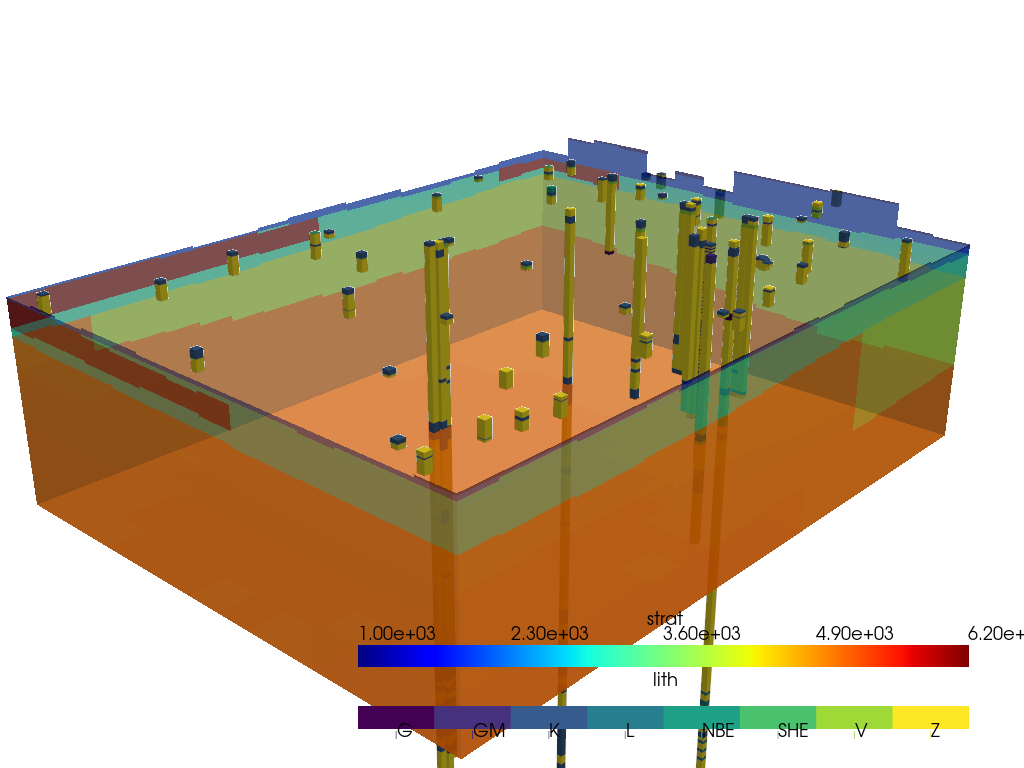

In [8]:
# Create a simple 3D plot using PyVista
plotter = pv.Plotter()
plotter.add_mesh(boreholes_usp_pyvista, scalars="lith")
plotter.add_mesh(
    geotop_usp_pyvista,
    opacity=0.7,
    scalars="strat",
    nan_opacity=0,
    cmap="jet",
)
plotter.set_scale(zscale=10)
plotter.camera_position = [(142800, 457600, 1100), (140400, 455400, -300), (0, 0, 1)]
plotter.show(jupyter_backend="static")